In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs

In [21]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

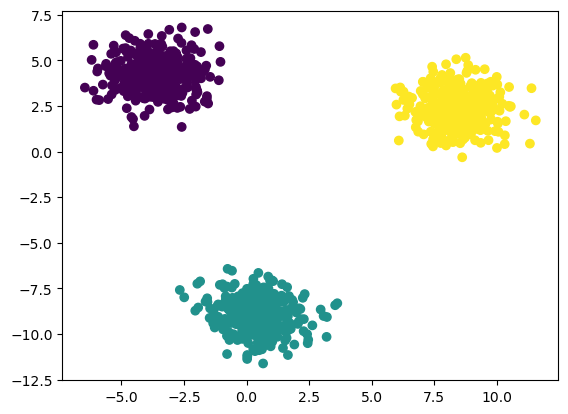

In [22]:
plt.scatter(X[:,0],X[:,1],c=y)

In [23]:
##Standardization
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [25]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [31]:
X_train_scaled=scaler.fit_transform(X_train)

In [32]:
X_test_scaled=scaler.transform(X_test)

In [33]:
##Elbow method

In [35]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [36]:
wcss

[1340.0000000000002,
 675.27290606975,
 46.989293283301286,
 40.84522457385316,
 37.20286737938616,
 29.984439288366058,
 25.64633850814987,
 24.091210321443143,
 22.197346414095264,
 19.219637644924852]

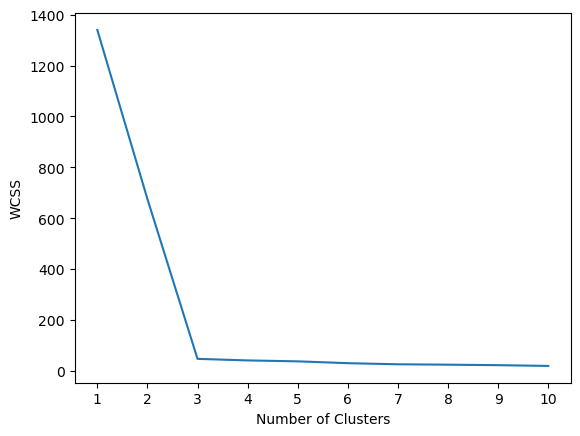

In [39]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [40]:
kmeans=KMeans(n_clusters=3,init='k-means++')


In [46]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [47]:
y_pred=kmeans.predict(X_test_scaled)

In [48]:
y_pred

array([2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1,
       0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 1,
       0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1,
       1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,

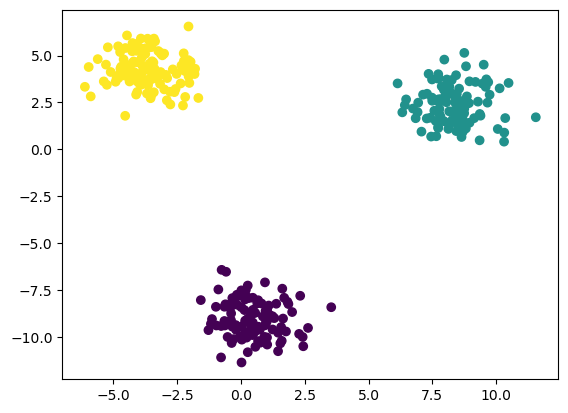

In [49]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [50]:
##Validating

In [51]:
##Knne locator

In [52]:
from kneed import KneeLocator

In [54]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [56]:
kl.elbow

3

In [66]:
##Silhoutte Scoring

In [58]:
from sklearn.metrics import silhouette_score

In [62]:
silhouette_coeffs=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coeffs.append(score)

In [63]:
silhouette_coeffs

[0.5822579318051825,
 0.8569135911051917,
 0.6977823597553974,
 0.5236502752490236,
 0.5101842530135506,
 0.5211173299245242,
 0.3652889332337412,
 0.33756166523442555,
 0.349578216873019]

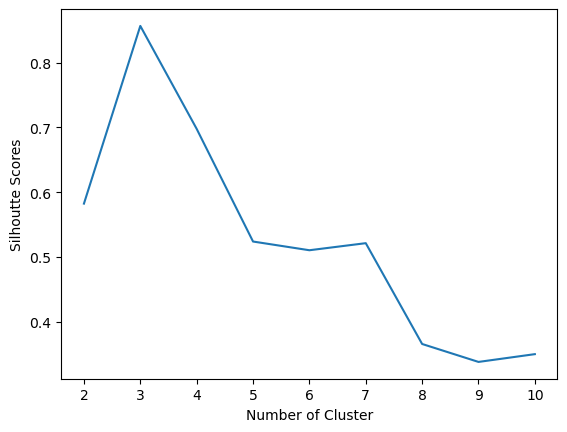

In [65]:
plt.plot(range(2,11),silhouette_coeffs)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("Silhoutte Scores")
plt.show()